In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Eth 7 days prices changes data set


,d7,d6,d5,d4,d3,d2,d1,next3
0,-72.804152,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-38.317744
1,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-39.834137
2,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-17.137215
3,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,22.302679
4,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,-9.166667,27.359757


Eth 7 days prices changes description


,d7,d6,d5,d4,d3,d2,d1,next3
count,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000,794.000000
mean,0.948111,1.040854,1.050960,1.050066,1.000127,0.982795,0.918699,2.767284
std,8.186068,7.755246,7.750207,7.750262,7.553019,7.538883,7.335204,13.218416
min,-72.804152,-27.055306,-27.055306,-27.055306,-27.055306,-27.055306,-27.055306,-43.692932
25%,-2.715867,-2.652283,-2.627643,-2.627643,-2.627643,-2.627643,-2.627643,-4.459582
50%,-0.089313,-0.077375,-0.062051,-0.062051,-0.062051,-0.062051,-0.077375,0.747895
75%,3.449686,3.449686,3.449686,3.449686,3.449686,3.433195,3.419009,7.861685
max,51.034374,51.034374,51.034374,51.034374,50.000000,50.000000,35.360360,72.305376


Next 3 days changes histogram


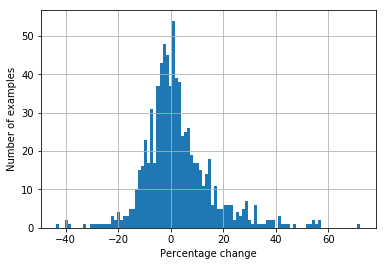

In [2]:
df = pd.read_csv('eth_7days.csv')

print "Eth 7 days prices changes data set"
display(df.head())
print "Eth 7 days prices changes description"

set_description = df.describe()
min_next3 = int(round(set_description.loc['min']['next3']))
max_next3 = int(round(set_description.loc['max']['next3']))
display(set_description)

print "Next 3 days changes histogram"
df['next3'].hist(bins=100)
plt.xlabel('Percentage change')
plt.ylabel('Number of examples')
plt.show()

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df['next3'].values.reshape(-1,1))
labels = pd.Series(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_)

display(centers)

,0
0,0.238477
1,37.131387
2,-12.118347
3,13.733263


In [4]:
df['labels'] = labels
display(df.head())

,d7,d6,d5,d4,d3,d2,d1,next3,labels
0,-72.804152,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-38.317744,2
1,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-39.834137,2
2,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-17.137215,2
3,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,22.302679,3
4,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,-9.166667,27.359757,1


In [5]:
active_cluster = -1
for i in range(min_next3-5, max_next3+5):
    current_cluster = kmeans.predict([[i]])[0]
    if current_cluster!=active_cluster:
        print "Cluster %d starts from %d"%(current_cluster, i)
        active_cluster=current_cluster
    

Cluster 2 starts from -49
Cluster 0 starts from -5
Cluster 3 starts from 7
Cluster 1 starts from 26


Next 3 days changes histogram


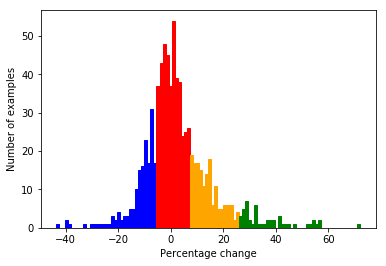

In [6]:
print "Next 3 days changes histogram"
n, bins, patches = plt.hist(df['next3'], 100)
plt.xlabel('Percentage change')
plt.ylabel('Number of examples')

clusters_colors = ['red', 'green', 'blue', 'orange', 'pink', 'yellow', 'gray', 'black']

for i, _ in enumerate(patches):
    cluster = kmeans.predict([[bins[i]]])[0]
    patch = patches[i]
    color = clusters_colors[cluster]
    patch.set_color(color)
        
plt.show()

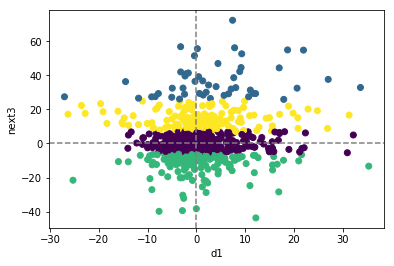

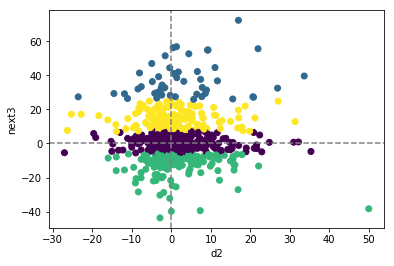

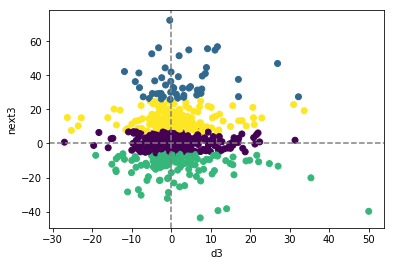

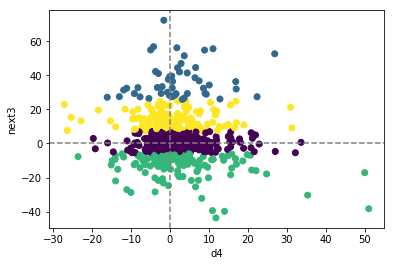

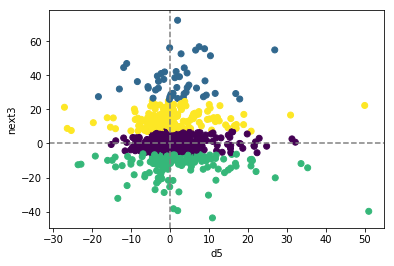

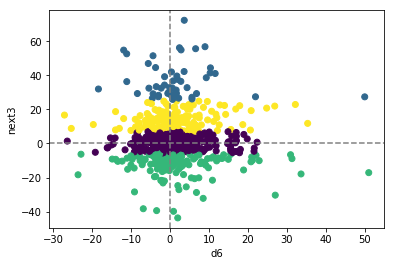

In [7]:
for i in range(1,7):
    col = 'd'+str(i)
    plt.scatter(df[col], df['next3'], c=df['labels'])
    
    plt.axhline(0, color = 'gray', linestyle = 'dashed')
    plt.axvline(0, color = 'gray', linestyle = 'dashed')
    plt.xlabel(col)
    plt.ylabel('next3')
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

#X = df.loc[:, df.columns != 'labels']
X = df[['d7', 'd6', 'd5', 'd4', 'd3', 'd2', 'd1']]
y = df['labels']

display(X.head())                                          
display(y.head())
                                          
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=16)


,d7,d6,d5,d4,d3,d2,d1
0,-72.804152,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000
1,-6.826801,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273
2,0.933328,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592
3,51.034374,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879
4,14.018692,50.000000,0.000000,-7.650273,-7.100592,-23.566879,-9.166667


0    2
1    2
2    2
3    3
4    1
Name: labels, dtype: int32

In [26]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#clf = svm.SVC()
#clf = DecisionTreeClassifier(max_depth = 5)

# Simple learning without cross-validation
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print accuracy_score(y_test, y_pred)
# 0.513307984791

#scores = cross_val_score(clf, X_train, y_train, cv=5)

#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


0.486692015209


In [10]:
#from sklearn.tree import export_graphviz

#export_graphviz(clf,
#      out_file='eth_7days_tree.dot',
#      feature_names=['d7', 'd6', 'd5', 'd4', 'd3', 'd2', 'd1'])


To visualize created tree: dot -Tpng eth_7days_tree.dot -o teth_7days_tree.png